In [ ]:
import pandas as pd
import numpy as np
# import required libraries for tree based models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


## EDA

In [ ]:
df =  pd.read_csv('bow_df.csv')

C:\Users\12494\AppData\Local\Temp\ipykernel_25676\3292715788.py:1: DtypeWarning: Columns (8,16,20,21,23,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv('bow_df.csv')


In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Username,User_id,bio,first_name,followers,following,initials,items_sold,...,label,rocawear,drawstring,📥,y2kstyle,suede,south,approx,cybergrunge,95
0,0,0,revivalstudios,36085867,b'Lost Clothing that needs revival \xf0\x9f\x9...,b'Revival Studios',886,59,b'R',600,...,0,0,0,0,0,0,0,0,0,0
1,1,1,revivalstudios,36085867,b'Lost Clothing that needs revival \xf0\x9f\x9...,b'Revival Studios',886,59,b'R',600,...,0,0,0,0,0,0,0,0,0,0
2,2,2,revivalstudios,36085867,b'Lost Clothing that needs revival \xf0\x9f\x9...,b'Revival Studios',886,59,b'R',600,...,0,0,0,0,0,0,0,0,0,0
3,3,3,revivalstudios,36085867,b'Lost Clothing that needs revival \xf0\x9f\x9...,b'Revival Studios',886,59,b'R',600,...,0,0,0,0,0,0,0,0,0,0
4,4,4,revivalstudios,36085867,b'Lost Clothing that needs revival \xf0\x9f\x9...,b'Revival Studios',886,59,b'R',600,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns[:50]

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Username', 'User_id', 'bio',
       'first_name', 'followers', 'following', 'initials', 'items_sold',
       'last_name', 'last_seen', 'Avatar', 'reviews_rating', 'reviews_total',
       'verified', 'website', 'ID', 'Sold', 'Gender', 'Category',
       'subcategory', 'size', 'State', 'Brand', 'Colors', 'Price', 'Image',
       'Description', 'Title', 'Platform', 'Address', 'discountedPriceAmount',
       'dateUpdated', 'Type', 'vintage', 'and', 'the', 'a', 'condition', 'to',
       'for', 'is', 'in', 'are', 'of', 'y2k', '90s', 'with', 'on'],
      dtype='object')

In [ ]:
df.reviews_rating.value_counts()

reviews_rating
5.000000    107017
4.950000      9752
4.900000      7962
4.850000      7656
4.700000      6867
4.800000      5305
4.550000      4369
2.700000      3187
4.650000      2932
4.750000      2173
4.400000      1919
0.000000      1241
3.800000       826
4.200000       353
4.636364       211
4.350000       190
4.300000       159
4.722222       135
4.933333       125
4.875000        88
4.600000        74
3.450000        25
4.833333        15
3.666667         9
Name: count, dtype: int64

In [ ]:
df.Type.value_counts()

Type
0    154837
1      7753
Name: count, dtype: int64

In [ ]:
# no inofrmartion rate
1-(7753/(7753+154837))

0.9523156405683006

In [ ]:
# drop unnecessary columns
drop_cols = ['Unnamed: 0', 'Unnamed: 0.1', 'User_id' , 'bio', 'first_name', 'last_name', 'Image', 'Description','Username', 'initials' ,'website', 'Platform', 'Address', 'discountedPriceAmount', 'last_seen']
df.drop(drop_cols, axis = 1, inplace = True)
df.columns[:50]

Index(['followers', 'following', 'items_sold', 'Avatar', 'reviews_rating',
       'reviews_total', 'verified', 'ID', 'Sold', 'Gender', 'Category',
       'subcategory', 'size', 'State', 'Brand', 'Colors', 'Price', 'Title',
       'dateUpdated', 'Type', 'vintage', 'and', 'the', 'a', 'condition', 'to',
       'for', 'is', 'in', 'are', 'of', 'y2k', '90s', 'with', 'on', 'pit',
       'great', 'no', 'length', 'good', 'shirt', 'questions', 'any', 'or',
       'pants', 'measurements', 'super', 'me', 'fit', 'xl'],
      dtype='object')

In [ ]:
# convert Price form '20.00USD' to 20.00
df['Price'] = df['Price'].str[:-3]
df['Price'] = df['Price'].astype(float)

In [ ]:
# cehck data types
df.dtypes[:50]

followers           int64
following           int64
items_sold          int64
Avatar             object
reviews_rating    float64
reviews_total       int64
verified             bool
ID                  int64
Sold               object
Gender             object
Category           object
subcategory        object
size                int64
State              object
Brand              object
Colors             object
Price             float64
Title              object
dateUpdated        object
Type                int64
vintage             int64
and                 int64
the                 int64
a                   int64
condition           int64
to                  int64
for                 int64
is                  int64
in                  int64
are                 int64
of                  int64
y2k                 int64
90s                 int64
with                int64
on                  int64
pit                 int64
great               int64
no                  int64
length      

In [ ]:
# check missing values in each column
df.isnull().sum()[:25]


followers             0
following             0
items_sold            0
Avatar              481
reviews_rating        0
reviews_total         0
verified              0
ID                    0
Sold                  0
Gender             1399
Category              0
subcategory       15259
size                  0
State             27654
Brand             32465
Colors            33948
Price                 0
Title                 0
dateUpdated           0
Type                  0
vintage               0
and                   0
the                   0
a                     0
condition             0
dtype: int64

In [ ]:
# drop rows with missing values
df.dropna(inplace = True)
df.isnull().sum()[:25]

followers         0
following         0
items_sold        0
Avatar            0
reviews_rating    0
reviews_total     0
verified          0
ID                0
Sold              0
Gender            0
Category          0
subcategory       0
size              0
State             0
Brand             0
Colors            0
Price             0
Title             0
dateUpdated       0
Type              0
vintage           0
and               0
the               0
a                 0
condition         0
dtype: int64

In [ ]:
import gc

gc.collect()

0

In [ ]:
# do one hot encoding for categorical variables
cat_features = ['verified', 'Sold', 'Gender', 'Category', 'subcategory', 'State',
                'Brand', 'Colors', 'dateUpdated','Title']
# count the unique values in each cat_col
for col in cat_features:
    print(col, df[col].nunique())

verified 2
Sold 3
Gender 2
Category 12
subcategory 77
State 5
Brand 1537
Colors 378
dateUpdated 94147
Title 94147


In [ ]:
# visualzie brands with the highest number of products
df.Brand.value_counts()[:10]

Brand
american-vintage    15126
unbranded           11390
carhartt             6732
nike                 5314
levi-s               4429
harley-davidson      2640
wrangler             2635
russell-athletic     2252
dickies              2052
champion             1403
Name: count, dtype: int64

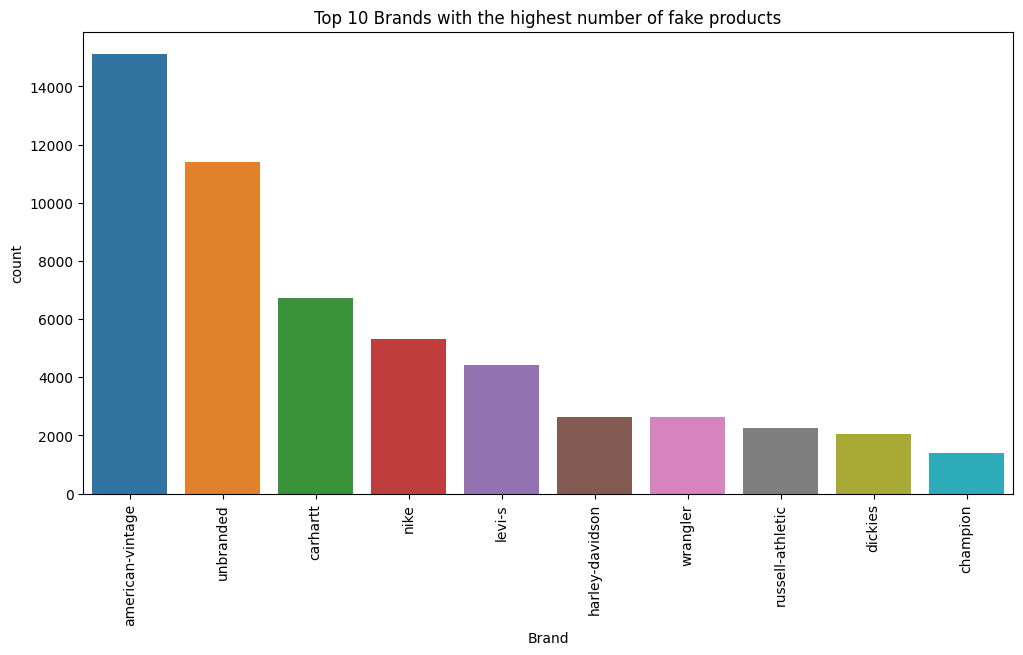

In [ ]:
# Under stand what Brand as more Type 1
# plot the top 10 brands with the highest number of Type 1
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Brand', data = df, order = df.Brand.value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.title('Top 10 Brands with the highest number of fake products')
plt.show()


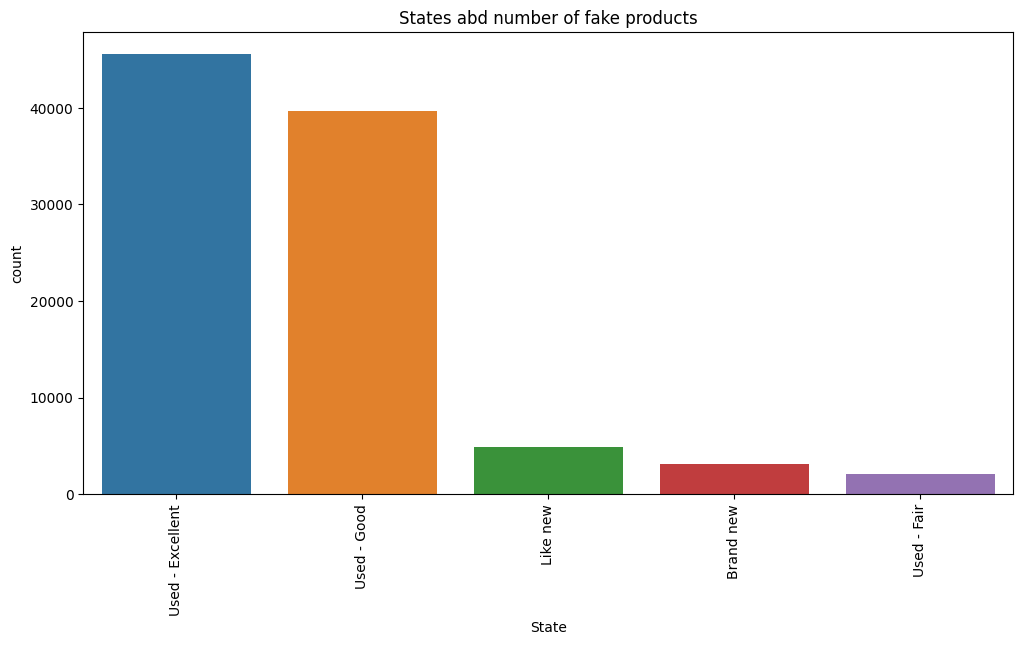

In [ ]:
# plot the State with the highest number of Type 1
plt.figure(figsize = (12, 6))
sns.countplot(x = 'State', data = df, order = df.State.value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.title('States abd number of fake products')
plt.show()


In [ ]:
df.Gender.value_counts()

Gender
male      79211
female    16136
Name: count, dtype: int64

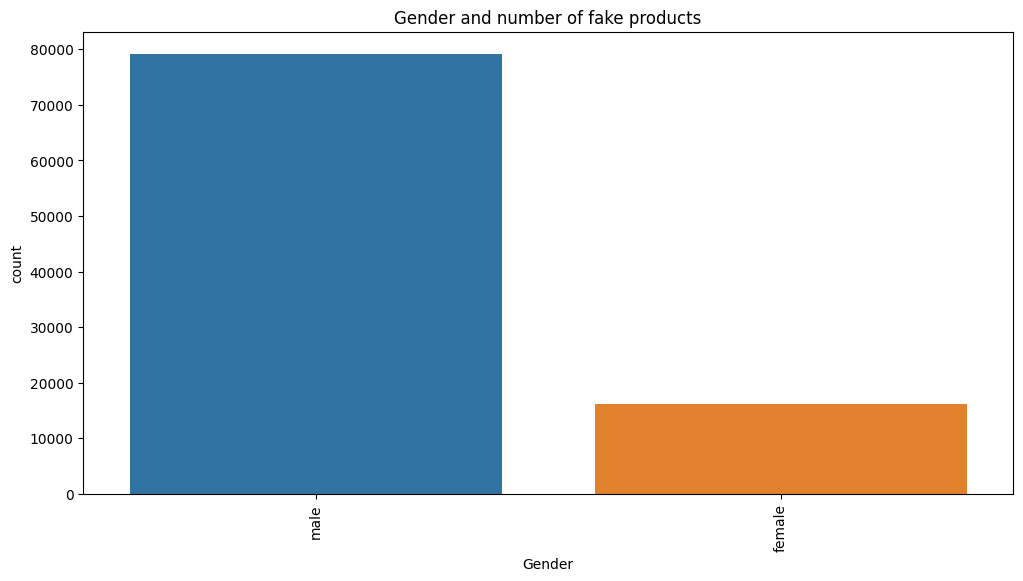

In [ ]:
# plot the gender and Type 1, use countplot
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Gender', data = df, order = df.Gender.value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.title('Gender and number of fake products')
plt.show()

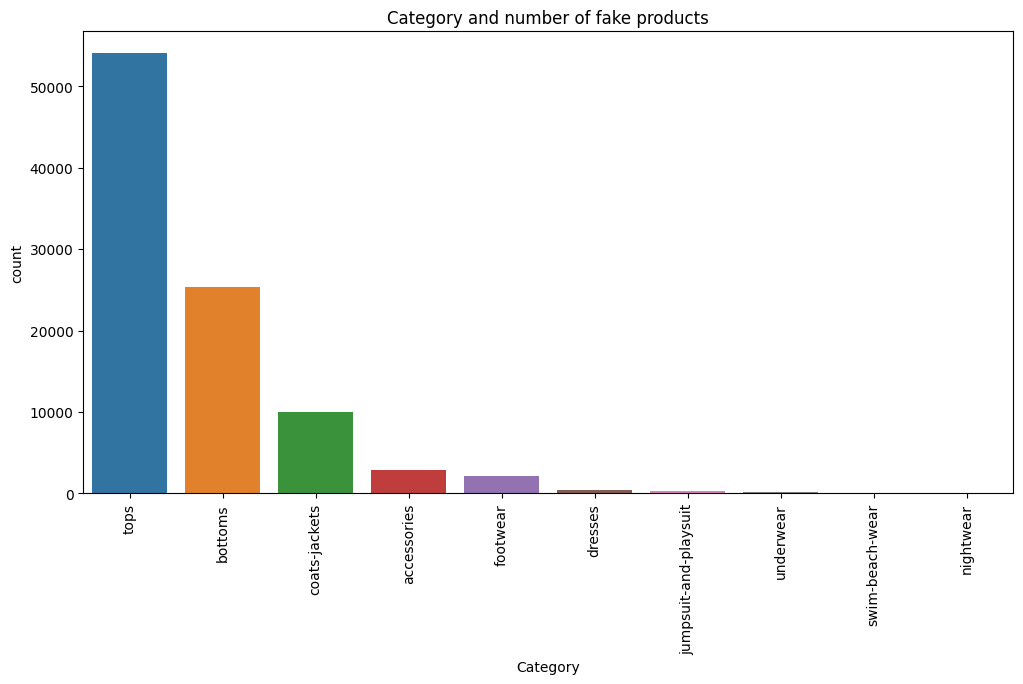

In [ ]:
# plot the Category and Type 1, use countplot
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Category', data = df, order = df.Category.value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.title('Category and number of fake products')
plt.show()


In [ ]:
# drop dateUpdated column
df.drop(['dateUpdated', 'Title'], axis = 1, inplace = True)

In [ ]:
df.drop('Avatar', axis = 1, inplace = True)

In [ ]:
# one hot encoding
cat_features = ['verified', 'Sold', 'Gender', 'Category', 'subcategory', 'State',
                'Brand', 'Colors']
df = pd.get_dummies(df, columns = cat_features, drop_first = True)

In [ ]:
print(df.shape)

(95347, 3016)


In [ ]:
df.dtypes[:20]

followers           int64
following           int64
items_sold          int64
reviews_rating    float64
reviews_total       int64
ID                  int64
size                int64
Price             float64
Type                int64
vintage             int64
and                 int64
the                 int64
a                   int64
condition           int64
to                  int64
for                 int64
is                  int64
in                  int64
are                 int64
of                  int64
dtype: object

In [ ]:
df.columns[:20]

Index(['followers', 'following', 'items_sold', 'reviews_rating',
       'reviews_total', 'ID', 'size', 'Price', 'Type', 'vintage', 'and', 'the',
       'a', 'condition', 'to', 'for', 'is', 'in', 'are', 'of'],
      dtype='object')

## Random Forest

In [ ]:
# run a tree based model on the data random forest
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X = df.drop('Type', axis = 1)
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)


In [ ]:
# fit model
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# check accuracy
rfc_pred = rfc.predict(X_test)
print(accuracy_score(y_test, rfc_pred))


0.9988463555322497


In [ ]:
# check confusion matrix
print(confusion_matrix(y_test, rfc_pred))

[[27240     0]
 [   33  1332]]


In [ ]:
# tune the hyperparameters
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
              'criterion': ['gini', 'entropy']}
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
print(accuracy_score(y_test, grid_predictions))
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))



In [ ]:
X.columns[:25]

Index(['followers', 'following', 'items_sold', 'reviews_rating',
       'reviews_total', 'ID', 'size', 'Price', 'vintage', 'and', 'the', 'a',
       'condition', 'to', 'for', 'is', 'in', 'are', 'of', 'y2k', '90s', 'with',
       'on', 'pit', 'great'],
      dtype='object')

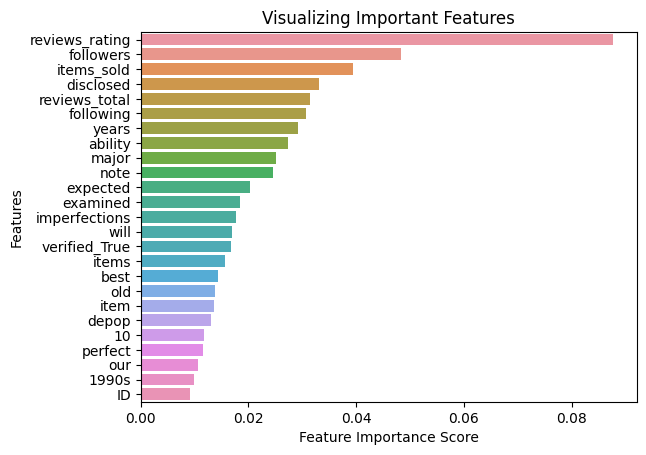

In [ ]:
# plot feature importance higher at the top, select the top 25 features
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
feature_imp = pd.Series(rfc.feature_importances_, index = X.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp[:25], y = feature_imp.index[:25])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()


## XG-Boost

In [ ]:
# run a xgboost model on the data
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(accuracy_score(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


0.9999650410767348
[[27240     0]
 [    1  1364]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27240
           1       1.00      1.00      1.00      1365

    accuracy                           1.00     28605
   macro avg       1.00      1.00      1.00     28605
weighted avg       1.00      1.00      1.00     28605



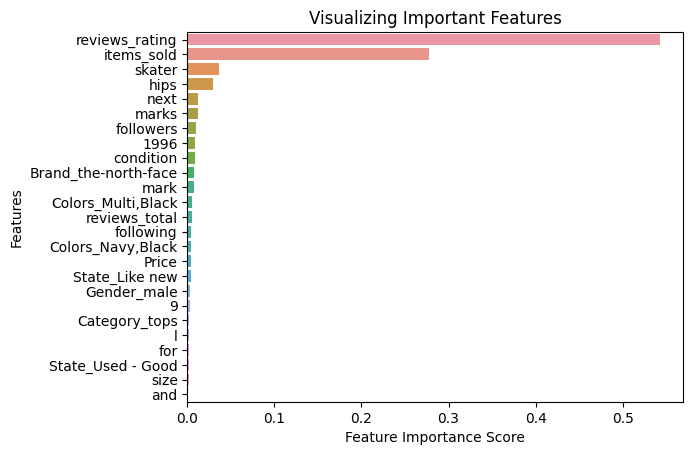

In [ ]:
# plot feature importance higher at the top, select the top 25 features
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
feature_imp = pd.Series(xgb.feature_importances_, index = X.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp[:25], y = feature_imp.index[:25])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

## Graident Bossting

In [ ]:
# run a gradient boosting model on the data
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
print(accuracy_score(y_test, gbc_pred))
print(confusion_matrix(y_test, gbc_pred))
print(classification_report(y_test, gbc_pred))


0.9998252053836741
[[27240     0]
 [    5  1360]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27240
           1       1.00      1.00      1.00      1365

    accuracy                           1.00     28605
   macro avg       1.00      1.00      1.00     28605
weighted avg       1.00      1.00      1.00     28605



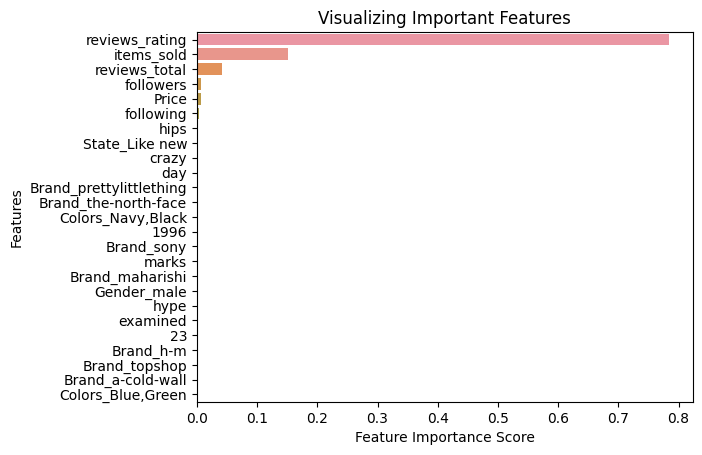

In [ ]:
# plot feature importance higher at the top, select the top 25 features
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
feature_imp = pd.Series(gbc.feature_importances_, index = X.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp[:25], y = feature_imp.index[:25])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()


## Decision Tree

In [ ]:
# run a decision tree model on the data
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
print(accuracy_score(y_test, dtree_pred))
print(confusion_matrix(y_test, dtree_pred))
print(classification_report(y_test, dtree_pred))


0.9995455339975529
[[27236     4]
 [    9  1356]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27240
           1       1.00      0.99      1.00      1365

    accuracy                           1.00     28605
   macro avg       1.00      1.00      1.00     28605
weighted avg       1.00      1.00      1.00     28605



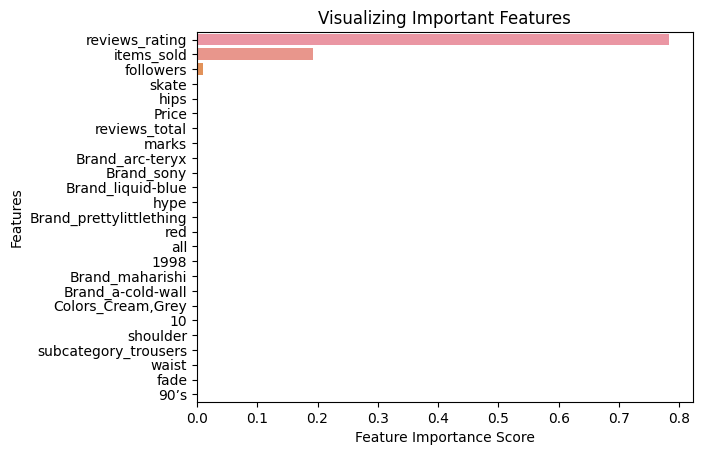

In [ ]:
# plot feature importance higher at the top, select the top 25 features
feature_imp = pd.Series(dtree.feature_importances_, index = X.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp[:25], y = feature_imp.index[:25])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()


## Kmeans

C:\Users\12494\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


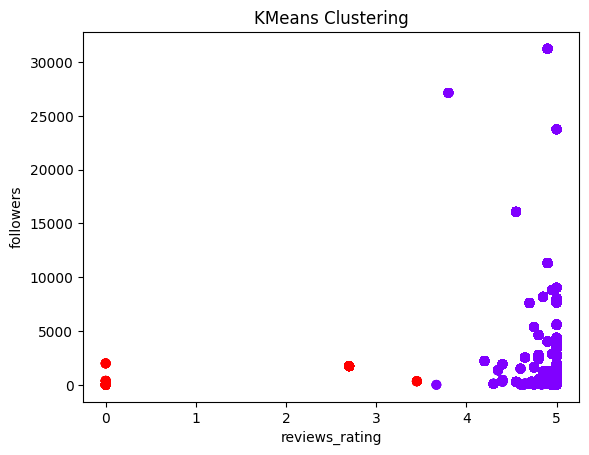

In [ ]:
# use reviews_rating and followers do a clustering with different colors of types as labels
# use kmeans clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['reviews_rating', 'followers']])
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
kmeans.cluster_centers_
kmeans.labels_
df['cluster'] = kmeans.labels_
df.head()
# plot the clusters
plt.scatter(df['reviews_rating'], df['followers'], c = df['cluster'], cmap = 'rainbow')
plt.xlabel('reviews_rating')
plt.ylabel('followers')
plt.title('KMeans Clustering')
plt.show()
